#### What if Bruce from 🙏🏻 Bruce Almighty 🙏🏻 knew how to play with data?
Bruce Almighty is a fantasy comedy film (Wikipedia) that inspired this exploratory data analysis project. ☺️ The idea came to me while (re)watching Bruce Almighty. 😁 (I also rewatched Liar Liar, Hot Shots: Part Deux, Ace Ventura etc. 😌... What? 🤨 Comedy is always the best!!! 😁... No? 🫤)

There’s a scene in Bruce Almighty where Bruce organizes all the prayers into a database, and it got me thinking about how such a dataset could be explored, cleaned, and analyzed to uncover patterns and insights. 🤔

Since I couldn’t find a dataset online, I asked ChatGPT to create one with a little over 100 rows and a few relevant columns (work smarter 😎, not harder 😏).

This project focuses on performing exploratory data analysis to understand the structure of the dataset, identify missing values, examine distributions, and explore relationships between different variables, essentially what I would do if I had to make sense of a database full of prayers while God went on a very short (extremely short 😅) vacation.

---
---

##### Importing necessary libraries for the first few steps and loading the dataset

Before cleaning the dataset or building any machine learning models, it is important to first understand the story the raw data is telling. This is achieved through exploratory data analysis (EDA).

EDA helps us understand the size of the dataset, the number of rows and columns, the presence of missing or null values, and potential reasons why those values might be missing. By following a structured set of EDA steps, we can make informed decisions about data cleaning and preprocessing.

In this step, we import the pandas library to load and read the dataset, and to perform the initial exploratory analysis.

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\marka\OneDrive\Desktop\PROJECTS AND LEARNING\BRUCE ALMIGHTY EDA\blessings_dataset.csv")

---

##### Checking the shape of the dataset

This answers the question "How big (in terms of rows and columns) is our dataset?"

The shape function [shape()] gives us the number of rows and columns, helping us understand the scale of the analysis ahead.

In [2]:
df.shape

(103, 5)

---

##### Information of datatypes (dtypes) and memory

info() gives us the information of the data types in each column, number of missing values, and the memory space our raw dataset uses.

It tells us how the dataset is:

- Are the fields stored correctly?
- Will it need cleaning?
- How "healthy" is the dataset?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   From           103 non-null    object
 1   Subject        103 non-null    object
 2   Urgency        95 non-null     object
 3   Deserve_Score  83 non-null     object
 4   Reference      103 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


---

##### Preview the dataset

Next, we take a quick glance at the raw dataset. This step helps us understand what the dataset looks like, what each column represents, how the values are formatted, and whether anything appears inconsistent, unusual, or out of place.

We can control how many rows are displayed by specifying a number inside the parentheses. For example:

df.head(10) shows the first 10 rows of the dataset.

By default, if no value is provided, df.head() displays the first 5 rows. As we can see, the first row starts with an index value of 0. This index is automatically assigned by pandas to uniquely identify each row in the DataFrame.

In [4]:
df.head()

,From,Subject,Urgency,Deserve_Score,Reference
0,Naruto Uzumaki,Please make my enemies trip on Lego bricks.,HIGH,8.5,Naruto
1,Luffy,Meat! And help me find the One Piece!,high,9,One Piece
2,Light Yagami,"Grant me a world free of crime, shaped by my j...",high,9.4,Death Note
3,Edward Elric,"Let me restore what I lost, even if it breaks me.",high,9.3,Fullmetal Alchemist
4,Tanjiro Kamado,Please heal Nezuko and give me strength to hel...,high,NaN,Demon Slayer


---

##### Descriptive Statistics

Here we compute basic statistical summaries to understand the dataset’s distributional behavior.

While numerical data benefits most from this, object fields also reveal patterns like the most frequent values.

It sets the tone for deeper dives into the variables ahead.

In [5]:
df.describe()

,From,Subject,Urgency,Deserve_Score,Reference
count,103,103,95,83,103
unique,98,97,6,35,44
top,Edward Elric,"Let me restore what I lost, even if it breaks me.",high,9,One Piece
freq,2,2,35,6,7


---

##### Checking for Missing Values

Missing values can significantly impact analysis and interpretation. In this step, we check each column to determine whether any values are null.

Understanding where missing values occur allows us to decide whether to clean, impute, or leave them as they are depending on their impact.

isna().sum() gives the total number of missing values in each columns, while isna().mean() gives the mean of the missing values in each column.

In [6]:
df.isna().sum()

From              0
Subject           0
Urgency           8
Deserve_Score    20
Reference         0
dtype: int64

In [7]:
# mean of null / missing values:

df.isna().mean()

From             0.000000
Subject          0.000000
Urgency          0.077670
Deserve_Score    0.194175
Reference        0.000000
dtype: float64

---

##### Checking for Duplicates

Duplicate rows can distort analysis by artificially inflating counts or repeating information. Here, we check whether any rows are duplicated and assess whether they need to be removed.

Ensuring data uniqueness strengthens the reliability of our findings.

In [8]:
df.duplicated().sum()

np.int64(3)

---

##### Univariate Analysis: Character Distribution

In this step, we focus on a single variable at a time. We analyze how frequently each character appears in the dataset.

Visualizing this distribution helps us identify which characters are most represented and whether the dataset is skewed toward certain individuals.

Univariate analysis allows us to understand each feature independently before exploring relationships.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

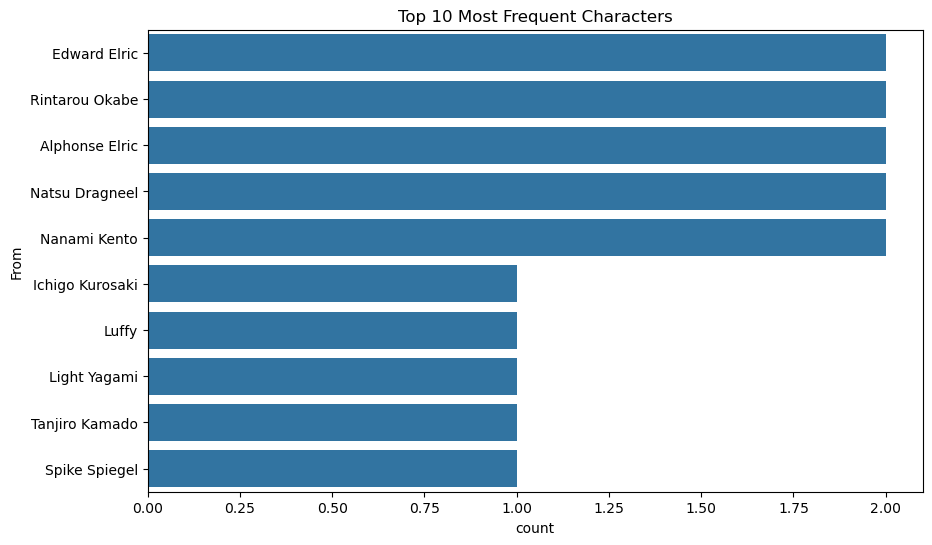

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y=df['From'],
    order=df['From'].value_counts().head(10).index
)
plt.title("Top 10 Most Frequent Characters")
plt.show()

---

##### Text Exploration Subject Diversity and Length Analysis

In this step, we look at the “Subject” column more closely.

First, we check how many unique subject lines there are. This tells us whether the requests are mostly different from each other or if many are repeated.

Next, we measure how long each subject is by counting the number of characters in it. We store this in a new column called Subject_length.

###### Why do we do this?

Because the Subject column contains text, and text cannot be directly summarized with numbers. By measuring the length of each subject, we turn part of the text into something we can analyze.

Then we look at basic statistics like the average length, the shortest subject, and the longest subject.

Finally, we create a histogram to see how the lengths are distributed. This helps us understand:

- Are most requests short?
- Are they medium length?
- Are there any unusually long or very short ones?

This step helps us better understand the structure of the text data in a simple and measurable way.

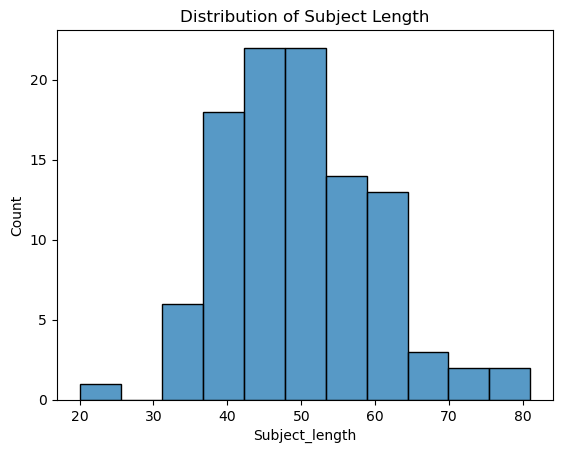

In [11]:
df['Subject'].nunique()
df['Subject_length'] = df['Subject'].str.len()
df['Subject_length'].describe()
sns.histplot(df['Subject_length'])
plt.title("Distribution of Subject Length")
plt.show()

---

##### Univariate Analysis: Urgency Analysis

Here, we analyze the distribution of urgency levels to understand how requests are categorized.

Before visualization, we have to make sure that everything in any column is the same, such as capitalization, to ensure consistent grouping. This prevents duplicate categories caused by inconsistent text formatting.

This step reveals how requests are distributed across urgency levels.

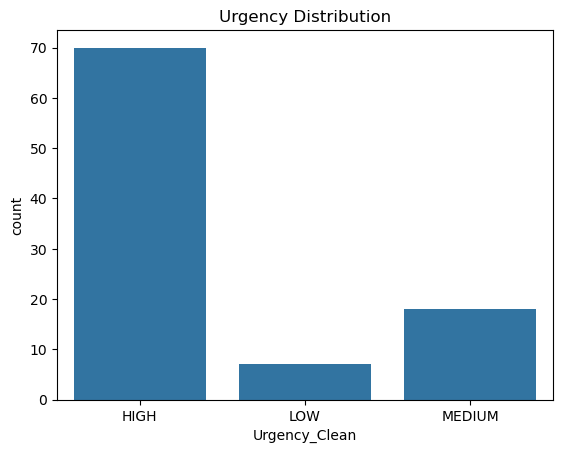

In [12]:
df['Urgency_Clean'] = df['Urgency'].str.strip().str.upper()
df['Urgency_Clean'].value_counts(dropna=False)
sns.countplot(x=df['Urgency_Clean'])
plt.title("Urgency Distribution")
plt.show()

#after cleaning the inconsistencies like "HIGH", "high", "High", etc

---

##### Univariate Analysis: Deserve_Score Distribution

We first have to convert the Deserve_Score column from object (string) type to numeric format. This is necessary for numerical operations, summary statistics, and visualizations, as they require a numeric data type.

Cleaning and correcting data types is a critical part of preparing the dataset for meaningful analysis.

We then analyze the Deserve_Score variable independently to understand its distribution.

Using summary statistics and visualizations such as boxplots or histograms, we examine:

- Central tendency
- Variability
- Potential outliers

This helps us understand how the Deserve_Score is spread across the dataset.

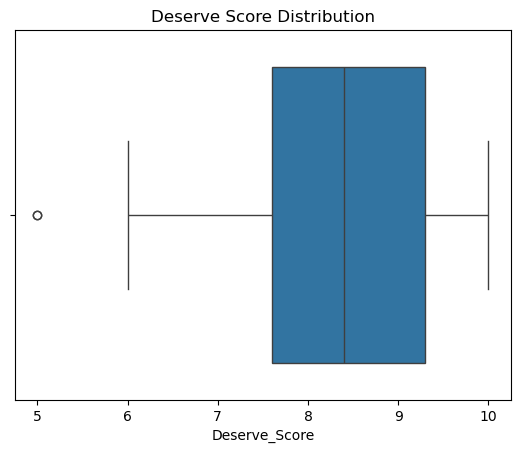

In [13]:
df['Deserve_Score'] = pd.to_numeric(df['Deserve_Score'], errors='coerce')
df['Deserve_Score'].describe()
sns.boxplot(x=df['Deserve_Score'])
plt.title("Deserve Score Distribution")
plt.show()

In [14]:
df['Deserve_Score'].isna().sum()

np.int64(31)

---

##### Univariate Analysis: Most Frequent References

In this step, we count how many times each anime reference appears in the dataset.

Instead of plotting all references (which would make the graph crowded), we focus only on the top 10 most frequent ones. This keeps the visualization clear and easy to interpret.

The countplot shows which anime appear the most and helps us understand whether certain references dominate the dataset

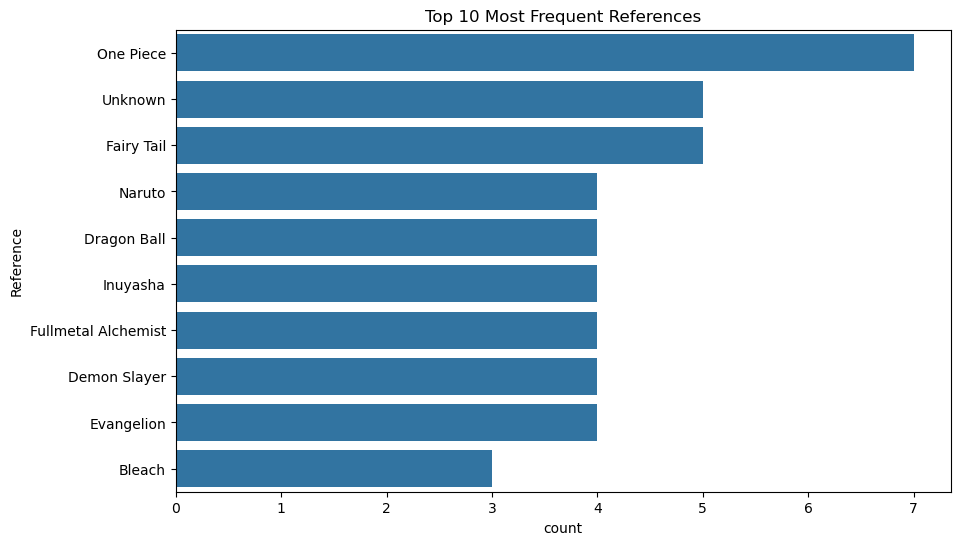

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y=df['Reference'],
    order=df['Reference'].value_counts().head(10).index
)
plt.title("Top 10 Most Frequent References")
plt.show()

---

##### Bivariate Analysis: Deserve Score by Urgency Level

In this step, we perform a bivariate analysis to examine the relationship between urgency level and Deserve_Score.

Instead of analyzing each column separately, we compare two variables at the same time:

- Urgency_Clean (refers to the cleaned version of the original Urgency column, where formatting inconsistencies [such as differences in capitalization] were corrected to ensure accurate grouping)
- Deserve_Score (refers to the corrected version of the score column after converting it from object (string) type to numeric format)

The boxplot helps us understand how Deserve_Score varies across different urgency levels (HIGH, MEDIUM, LOW). It shows the median score, the spread of values, and any unusually high or low observations within each group.

This allows us to explore whether urgency level appears to influence the deserving score assigned to each request.

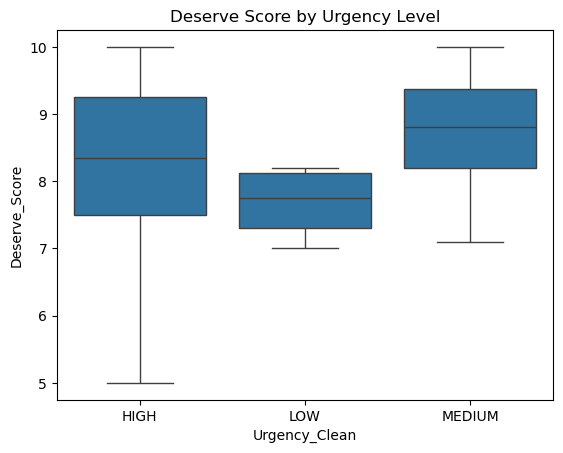

In [16]:
sns.boxplot(x=df['Urgency_Clean'], y=df['Deserve_Score'])
plt.title("Deserve Score by Urgency Level")
plt.show()

---

##### Bivariate Analysis: Top Characters by Average Deserve Score

In this step, we calculate the average Deserve_Score for each character.

We group the dataset by the "From" column and compute the mean score for each character. The results are then sorted in descending order to identify the top 10 characters with the highest average scores.

This helps us understand which characters, on average, received the highest deserving scores in the dataset.

In [17]:
df.groupby('From')['Deserve_Score'].mean().sort_values(ascending=False).head(10)

From
All Might             10.0
Escanor               10.0
Goku                  10.0
Touka Kirishima        9.8
Holo the Wise Wolf     9.8
Gintoki Sakata         9.8
Alphonse Elric         9.7
Sango                  9.7
Shinobu Kocho          9.6
Natsu Dragneel         9.5
Name: Deserve_Score, dtype: float64

---

##### Bivariate Analysis: Deserve_Score by Top 10 Characters

In this step, we examine how Deserve_Score varies across the top 10 most frequent characters in the dataset.

To keep the visualization clear, we first identify the 10 characters that appear most often. We then filter the dataset to include only those characters.

Using a boxplot, we compare the distribution of Deserve_Score for each character. This allows us to observe differences in median scores, variation, and overall trends.

This helps us understand whether certain characters tend to receive consistently higher or lower deserving scores.

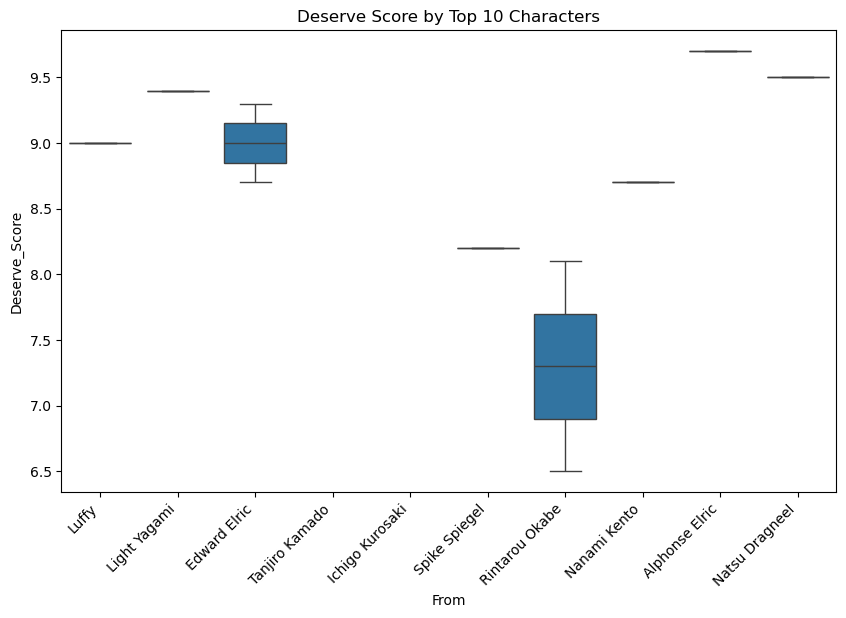

In [19]:
top_chars = df['From'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.boxplot(data=df[df['From'].isin(top_chars)], x='From', y='Deserve_Score')
plt.xticks(rotation=45, ha='right')
plt.title("Deserve Score by Top 10 Characters")
plt.show()

---

##### Bivariate Analysis: Deserve Score by Top 10 Anime References

In this step, we examine how Deserve_Score varies across the top 10 most frequent anime references in the dataset.

To keep the visualization clear and readable, we first identify the 10 anime that appear most often. We then filter the dataset to include only those references.

The boxplot shows how the scores change from one anime to another and helps us understand if some anime generally have higher or lower scores.

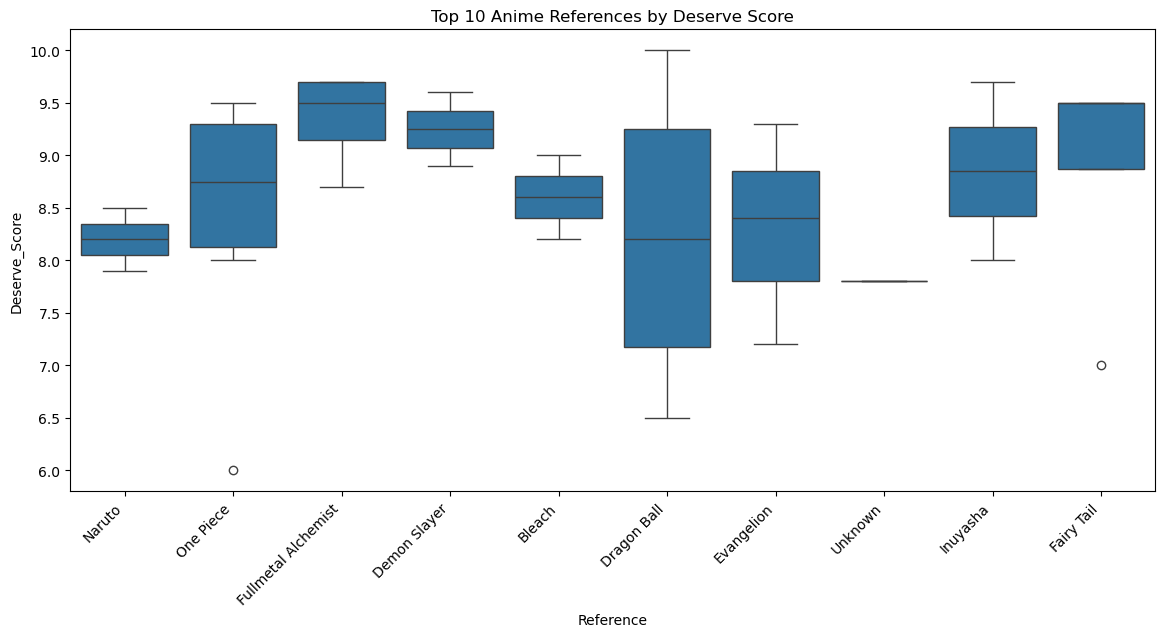

In [18]:
top_refs = df['Reference'].value_counts().head(10).index

plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['Reference'].isin(top_refs)], 
            x='Reference', y='Deserve_Score')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Anime References by Deserve Score")
plt.show()

---

##### Bivariate Analysis: Urgency Levels Across Anime References

In this step, we examine how urgency levels are distributed across different anime references.

We group the dataset by Reference and Urgency_Clean to count how many requests fall into each urgency category for every anime.

The stacked bar chart shows the total number of requests for each anime, divided into HIGH, MEDIUM, and LOW urgency levels.

This helps us understand whether certain anime tend to have more high-urgency requests compared to others and reveals patterns in how urgency is distributed across different references.

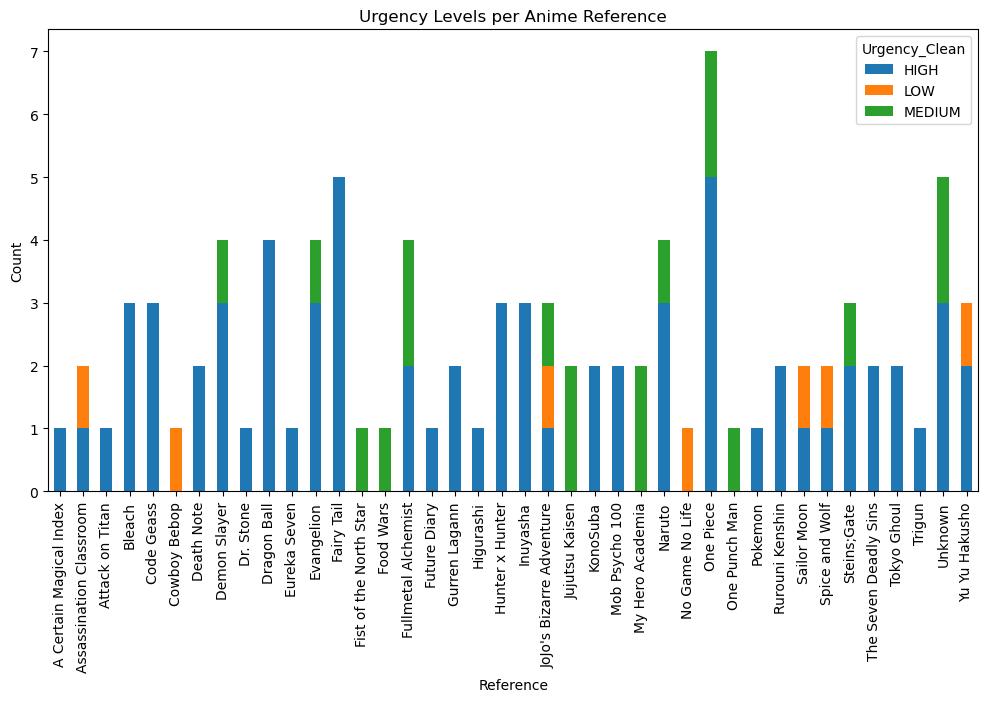

In [20]:
urgency_ref = df.groupby(['Reference', 'Urgency_Clean']).size().unstack(fill_value=0)
urgency_ref.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Urgency Levels per Anime Reference")
plt.ylabel("Count")
plt.show()

---

##### Exporting the Cleaned Dataset

In this final step, we create a copy of the cleaned dataset and export it as a new CSV file.

This ensures that all cleaning and preprocessing steps are preserved in a separate file. The cleaned dataset can now be reused for future analysis or shared externally.

We use index=False to prevent the automatic pandas index from being saved as an extra column in the CSV file.

This marks the completion of the exploratory data analysis process.

In [21]:
df_clean = df.copy()
df_clean.to_csv("blessings_dataset_cleaned.csv", index=False)

---

#####

#### Key Insights from EDA

After performing exploratory data analysis on the dataset, several patterns and observations emerged:

- The dataset is dominated by a few anime references.
  Certain anime appear more frequently than others, indicating that the dataset is not evenly distributed across all references
- Urgency levels are not evenly distributed.
  Some anime references show a higher proportion of HIGH urgency requests, while others contain more MEDIUM or LOW urgency entries
- Deserve_Score varies across urgency levels
  While HIGH urgency requests sometimes show strong scores, urgency alone does not guarantee a higher Deserve_Score. There is overlap between categories
- Deserve_Score differs across characters.
  Some characters have higher average scores compared to others. However, in some cases, high averages may be influenced by characters appearing only once or a few times in the dataset
- Deserve_Score also varies across anime references.
  Certain anime tend to have slightly higher median scores, while others show greater variation in their score distribution
- Subject lengths are mostly moderate.
  The majority of requests fall within a mid-range length, with only a few unusually short or long entries. This suggests that most requests are fairly detailed but not excessively long
- The dataset required minor cleaning.
  The Urgency column required standardization, and the Deserve_Score column needed conversion to numeric format to allow proper analysis

This exploratory analysis provides a structured understanding of the dataset and establishes a clean foundation for any future analytical or modeling work.